## Aplicação do Naive Bayes

O Naive Bayes é um dos modelos mais populares de aprendizado de máquina:<br>
>Ele toma como premissa a suposição de independência entre as variáveis do problema;<br>
> O modelo realiza uma classificação probabilística de observações, caracterrizando-as em classes pré-definidas;

As principais aplicações do método Naive Bayes é na análise de crédito, diagnósticos médicos ou detecção de spams.

## Importação das bibliotecas

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

## Abrindo e preparando os dados

O banco de dados apresenta informações de clientes do banco que fizeram a solicitação de crédito e se eles são bons pagadores. A partir desses dados é necessário desenvolver um modelo que aponte se ele os futuros clientes que solicitem crétito ao banco serão bons ou maus pagadores. 

In [32]:
## Importando o arquivo que serivá como teste e treino do modelo
credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [33]:
# Separando os previsores da classe
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:,20].values

In [34]:
# Transformação dos atributos categóricos em atributos numéricos
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

## Configuração e avaliação do modelo

In [35]:
# Dividindo os dados de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state = 0)

In [36]:
# Ajuste do modelo
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [47]:
# Previsões feitas com os dados de teste para posteriomente avaliar o ajuste da previsão com os dados reais
previsoes = naive_bayes.predict(X_test)

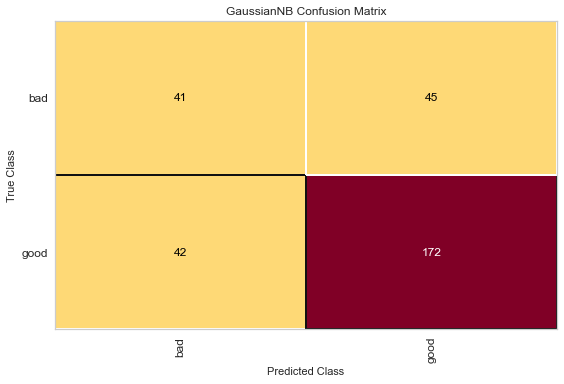

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [48]:
# Matriz de confusão: comparar a previsão com o real
confusao =  ConfusionMatrix(GaussianNB())
confusao.fit(X_train, y_train)
confusao.score(X_test, y_test)
confusao.poof()

In [39]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.71

O modelo apresentou 71% de chance de acerto da previsão 

## Previsão com os dados de um possível novo cliente

In [43]:
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [44]:
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:, 19])

In [45]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

Segundo a previsão do modelo, existe 71% de chance do cliente ser um bom pagador. <br>
Portanto, a possibilidade da liberação de crédito para este cliente ser mais segura é maior.